In [107]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('/Users/saikarthik/Desktop/xai /nasdq.csv', index_col=0, parse_dates=True)

df['AvgPrice'] = df[[ 'Close']].mean(axis=1)

df['Year'] = df.index.year

yearly_avg_price = df.groupby('Year')['AvgPrice'].mean()

print(yearly_avg_price)


Year
2010     6.692125
2011     8.376375
2012     8.011529
2013    10.776237
2014    13.479044
2015    17.313799
2016    21.774487
2017    24.060366
2018    29.106692
2019    31.657083
2020    39.437168
2021    58.461204
2022    58.316274
2023    53.889394
2024    64.199700
Name: AvgPrice, dtype: float64


In [109]:
yearly_avg_price.to_csv("yearly_avg_price.csv")

Predicted average price for 2025: 74.65


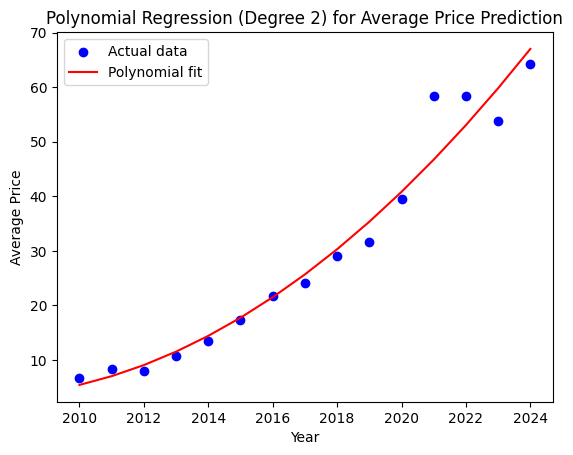

In [110]:
X = yearly_avg_price.index.values.reshape(-1, 1)
y = yearly_avg_price.values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

next_year = np.array([[2025]])
next_year_poly = poly.transform(next_year)
predicted_price = model.predict(next_year_poly)

print(f"Predicted average price for 2025: {predicted_price[0]:.2f}")

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X_poly), color='red', label='Polynomial fit')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Polynomial Regression (Degree 2) for Average Price Prediction')
plt.legend()
plt.show()


In [111]:
y_pred = model.predict(X_poly)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate R² score
r2 = r2_score(y, y_pred)

# Predict for the next year
next_year = np.array([[2025]])
next_year_poly = poly.transform(next_year)
predicted_price = model.predict(next_year_poly)

# Output the results
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"Predicted Price for 2025: {predicted_price[0]}")

RMSE: 3.9528835751156435
R² Score: 0.9598951416816964
Predicted Price for 2025: 74.64804059895687


In [112]:

weekly_avg_close = df['Close'].resample('W').mean()

weekly_avg_close.index = weekly_avg_close.index.to_period('W')

weekly_avg_close_df = pd.DataFrame({
    'Year': weekly_avg_close.index.year,
    'Week': weekly_avg_close.index.week,
    'Average Price': weekly_avg_close.values
})

print(weekly_avg_close_df)


     Year  Week  Average Price
0    2010     1       6.738667
1    2010     2       6.716000
2    2010     3       6.502000
3    2010     4       6.068667
4    2010     5       6.214667
..    ...   ...            ...
772  2024    43      74.486002
773  2024    44      75.003999
774  2024    45      77.081999
775  2024    46      79.096001
776  2024    47      79.779999

[777 rows x 3 columns]


In [113]:
weekly_avg_close.to_csv("weekly_avg_close.csv")

In [114]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [115]:
df=pd.read_csv("weekly_avg_close.csv")


In [116]:
df.columns

Index(['Unnamed: 0', 'Close'], dtype='object')

In [117]:
df.head()

,Unnamed: 0,Close
0,2010-01-04/2010-01-10,6.738667
1,2010-01-11/2010-01-17,6.716000
2,2010-01-18/2010-01-24,6.502000
3,2010-01-25/2010-01-31,6.068667
4,2010-02-01/2010-02-07,6.214667


In [118]:


df['Year'] = pd.to_datetime(df['Unnamed: 0'].str.split('/').str[0]).dt.year
df['Week'] = pd.to_datetime(df['Unnamed: 0'].str.split('/').str[0]).dt.isocalendar().week

X = df[['Year', 'Week']]
y = df['Close']




In [119]:
X = df[['Year', 'Week']]
y = df['Close']

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


In [120]:
X.head()

,Year,Week
0,2010,1
1,2010,2
2,2010,3
3,2010,4
4,2010,5


In [121]:
y.head()

0    6.738667
1    6.716000
2    6.502000
3    6.068667
4    6.214667
Name: Close, dtype: float64

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Generate predictions for the entire dataset for plotting
y_all_pred = model.predict(X_poly)

# Create a new DataFrame to store results
df['Predicted_Close'] = y_all_pred

Mean Squared Error: 24.321086418861015
R-squared Score: 0.9423936404999298


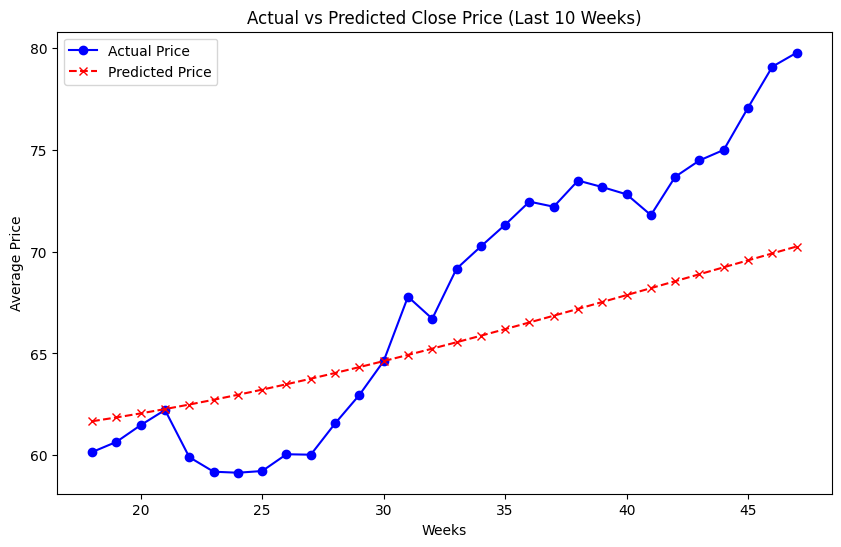

In [131]:
last_subset = df.tail(30)

# Plotting the actual and predicted close prices for the last 10 weeks
plt.figure(figsize=(10, 6))

# Plot Actual Close Prices
plt.plot(last_subset['Week'], last_subset['Close'], label='Actual Price', marker='o', linestyle='-', color='blue')

# Plot Predicted Close Prices
plt.plot(last_subset['Week'], last_subset['Predicted_Close'], label='Predicted Price', marker='x', linestyle='--', color='red')

# Adding labels and title
plt.xlabel('Weeks')
plt.ylabel('Average Price')
plt.title('Actual vs Predicted Close Price (Last 10 Weeks)')
plt.legend()

# Show the plot
plt.show()


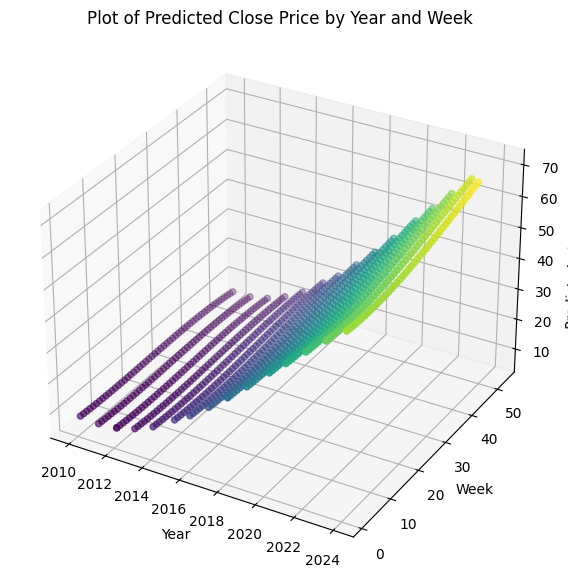

In [133]:
df['Predicted_Close'] = model.predict(X_poly)

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract Year, Week, and Predicted_Close for the plot
x = df['Year']
y = df['Week']
z = df['Predicted_Close']

# Create a 3D scatter plot
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Label the axes
ax.set_xlabel('Year')
ax.set_ylabel('Week')
ax.set_zlabel('Predicted Close Price')

# Set the title
ax.set_title('Plot of Predicted Close Price by Year and Week')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Calculate the predicted close prices
df['Predicted_Close'] = model.predict(X_poly)

# Calculate the average actual and predicted close prices for each year
avg_actual_close_per_year = df.groupby('Year')['Close'].mean()
avg_predicted_close_per_year = df.groupby('Year')['Predicted_Close'].mean()

# Create a plot
plt.figure(figsize=(10, 6))

# Plot actual and predicted close prices for each year
plt.plot(avg_actual_close_per_year.index, avg_actual_close_per_year, marker='o', label='Actual Close', color='blue')
plt.plot(avg_predicted_close_per_year.index, avg_predicted_close_per_year, marker='x', label='Predicted Close', color='red')

# Label the axes
plt.xlabel('Year')
plt.ylabel('Close Price')

# Set the title
plt.title('Average Actual vs Predicted Close Price per Year')

# Add a legend
plt.legend(title='Close Price')

# Show the plot
plt.grid(True)
plt.show()
